* Refrence : https://www.kaggle.com/code/alibulut1/california-housing-prices-prediction

In [1]:
# import libraries
import pandas as pd
import numpy as np
# visualization libraries
import seaborn as sns
from matplotlib import pyplot as plt
# model training libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# read data
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.shape

(20640, 10)

### Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#결측치 확인
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

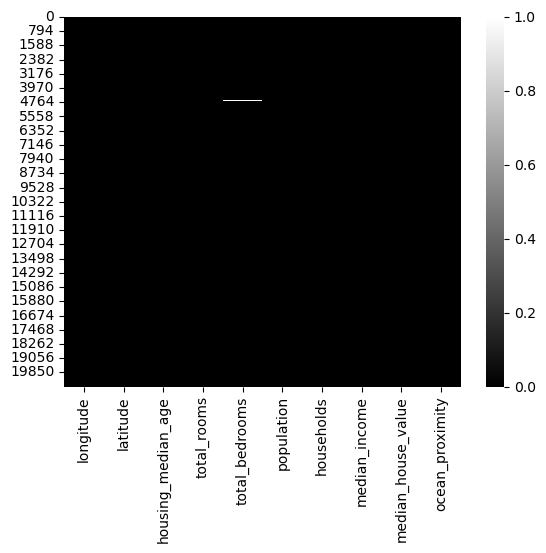

In [6]:
# see NaN samples
# 총 데이터 20640 중 207개가 nan 값이다
chart = sns.heatmap(data.isnull(), cmap="gray")
chart

### 결측치 다루기 Imputation

* "ocean_proximity" 컬럼 특이값들 중에서 total_bedrooms 평균을 찾음
* 위 의 값으로 결측치를 채워 total_bedrooms 값들의 평균을 균일하게 해준다
* 참고한 reference에서는 for문을 사용했지만 판다스에서 for문 사용은 지양하는게 좋다 (시간이오래걸림)
* groupby로 각 ocean_proximity 따라 total_bedrooms 평균을 구해서 loc 조건으로 적용했다

In [7]:
temp = data.copy()

In [8]:
data[pd.isnull(data["total_bedrooms"])].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [9]:
# groupby
tb_mean = temp.groupby("ocean_proximity")["total_bedrooms"].mean()
tb_mean

ocean_proximity
<1H OCEAN     546.539185
INLAND        533.881619
ISLAND        420.400000
NEAR BAY      514.182819
NEAR OCEAN    538.615677
Name: total_bedrooms, dtype: float64

In [10]:
temp["tb_fill"] = temp["total_bedrooms"]

In [11]:
temp.loc[(temp["ocean_proximity"] == "<1H OCEAN") & temp["total_bedrooms"].isnull(), "tb_fill"] = tb_mean[0]
temp.loc[(temp["ocean_proximity"] == "INLAND") & temp["total_bedrooms"].isnull(), "tb_fill"] = tb_mean[1]
temp.loc[(temp["ocean_proximity"] == "ISLAND") & temp["total_bedrooms"].isnull(), "tb_fill"] = tb_mean[2]
temp.loc[(temp["ocean_proximity"] == "NEAR BAY") & temp["total_bedrooms"].isnull(), "tb_fill"] = tb_mean[3]
temp.loc[(temp["ocean_proximity"] == "NEAR OCEAN") & temp["total_bedrooms"].isnull(), "tb_fill"] = tb_mean[4]

In [12]:
#tb_fill 컬럼이 채워진걸 확인할수 있다
temp.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
tb_fill                 0
dtype: int64

In [13]:
temp.iloc[341]

longitude                -122.17
latitude                   37.75
housing_median_age          38.0
total_rooms                992.0
total_bedrooms               NaN
population                 732.0
households                 259.0
median_income             1.6196
median_house_value       85100.0
ocean_proximity         NEAR BAY
tb_fill               514.182819
Name: 341, dtype: object

In [14]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  tb_fill             20640 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


In [15]:
temp.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,tb_fill
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,129.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1106.0


In [16]:
data = temp.copy()

In [17]:
#reference와 똑같음
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,tb_fill
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,537.880892
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,419.267735
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,297.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,438.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,643.250000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,6445.000000


In [18]:
# drop unnecessary columns
data = data.drop(["longitude", "latitude","total_bedrooms"], axis = 1)
data.head()

,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,tb_fill
0,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY,129.0
1,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1106.0
2,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY,190.0
3,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY,235.0
4,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY,280.0


### EDA and Data Visualization

In [19]:
data["ocean_proximity"].value_counts().sort_values()

ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
INLAND        6551
<1H OCEAN     9136
Name: ocean_proximity, dtype: int64

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

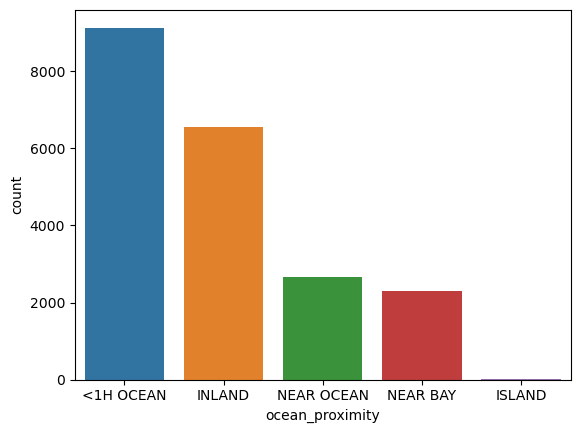

In [20]:
sns.countplot(data=data, x="ocean_proximity", order=data["ocean_proximity"].value_counts().sort_values(ascending=False).index)

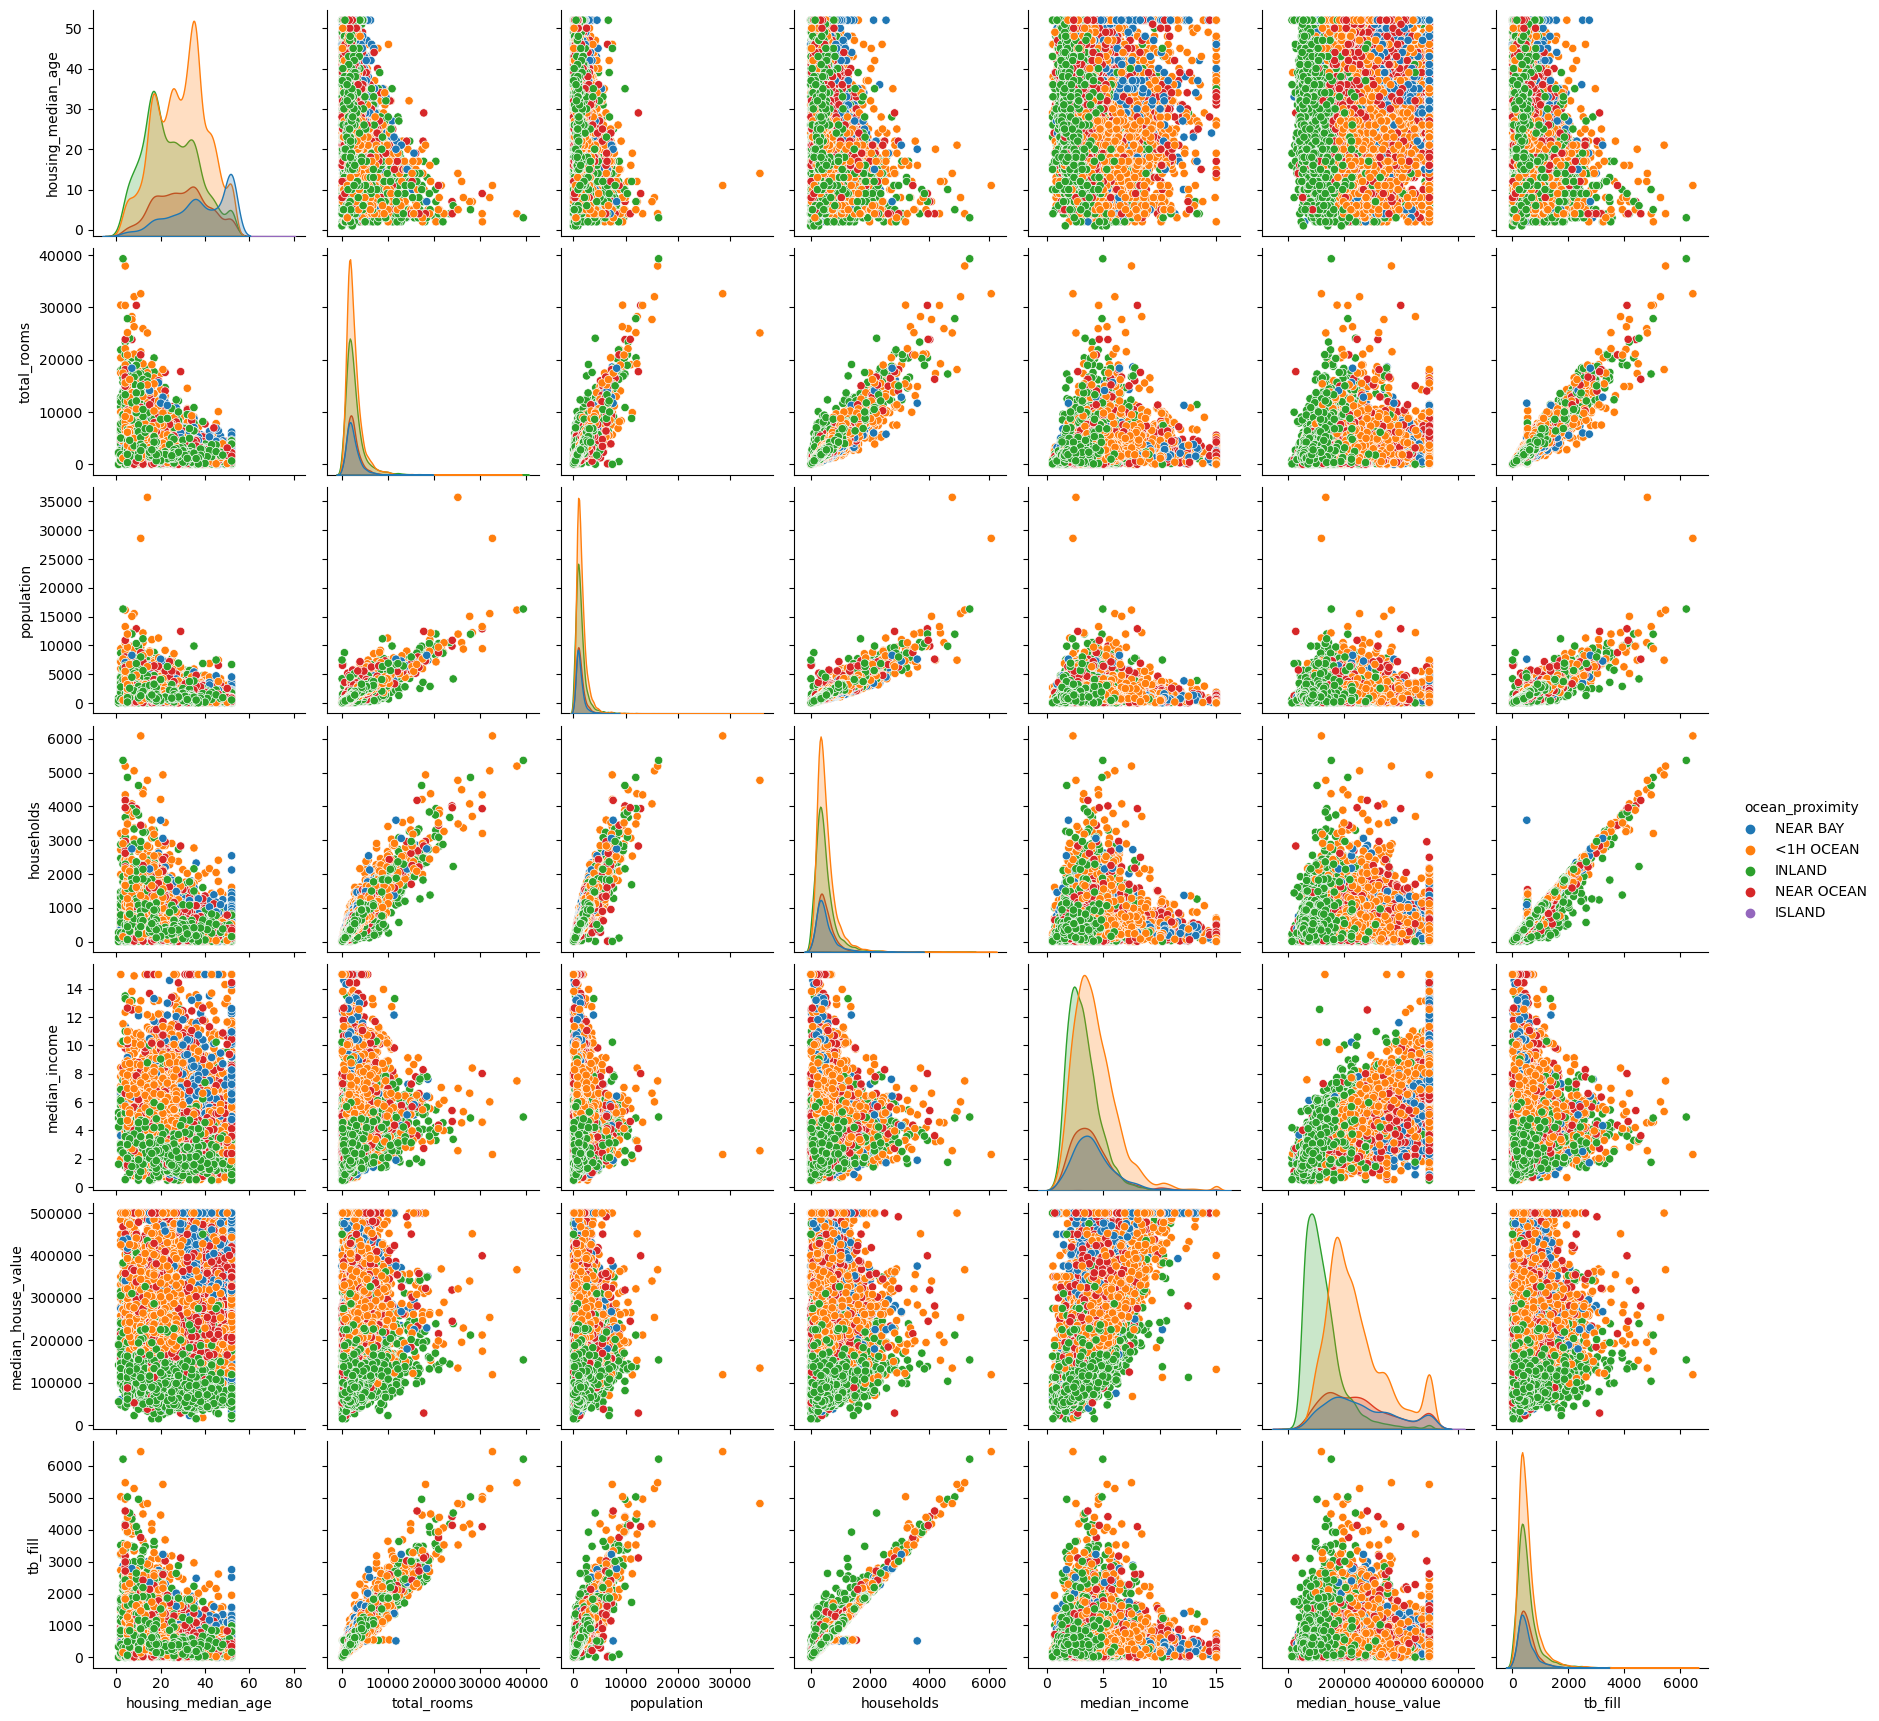

In [21]:
# see pairplot for relation between the variables 
sns.pairplot(data, hue="ocean_proximity")
plt.show()

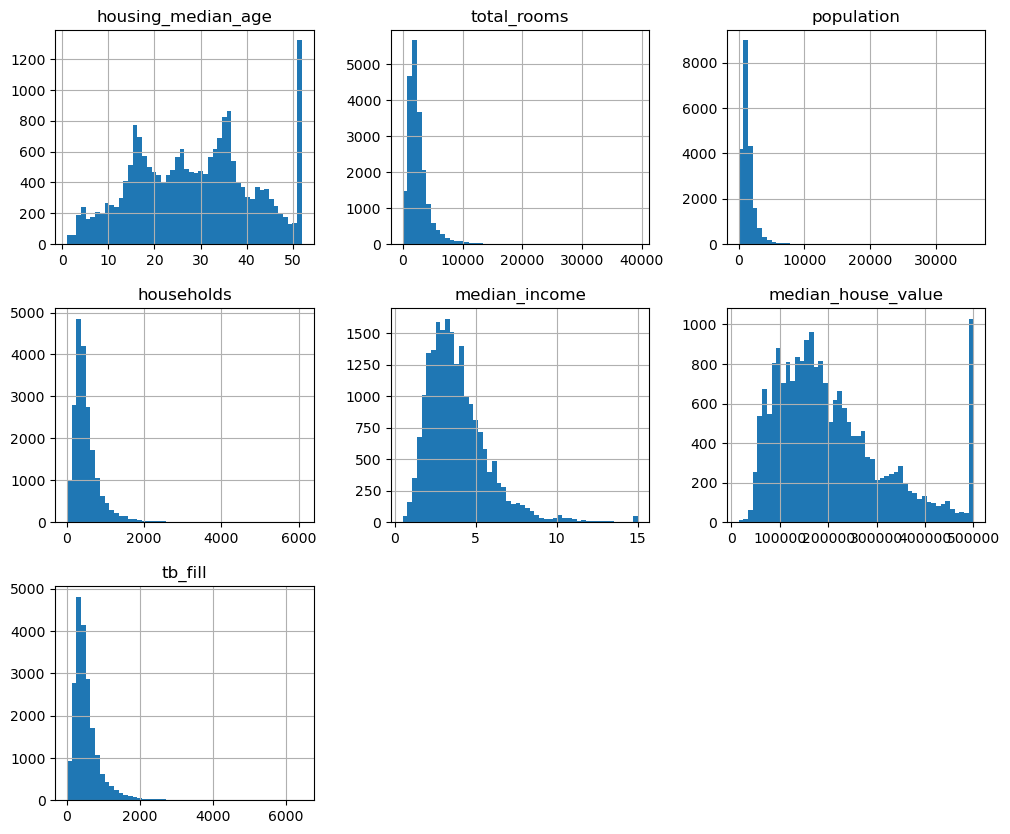

In [22]:
# 전체 변수에 대한 히스토그램
data.hist(figsize=(12,10), bins=50)
plt.show()

<AxesSubplot:>

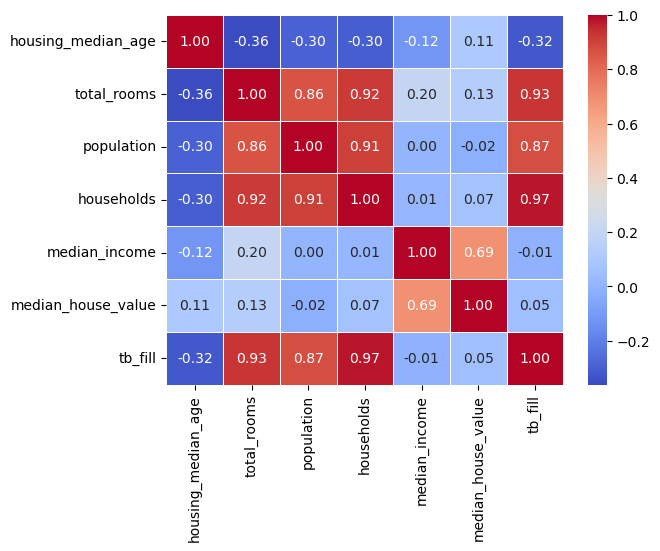

In [23]:
#상관관계 히트맵 시각화
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f', cmap='coolwarm')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  float64
 1   total_rooms         20640 non-null  float64
 2   population          20640 non-null  float64
 3   households          20640 non-null  float64
 4   median_income       20640 non-null  float64
 5   median_house_value  20640 non-null  float64
 6   ocean_proximity     20640 non-null  object 
 7   tb_fill             20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


In [25]:
data.columns

Index(['housing_median_age', 'total_rooms', 'population', 'households',
       'median_income', 'median_house_value', 'ocean_proximity', 'tb_fill'],
      dtype='object')

<AxesSubplot:>

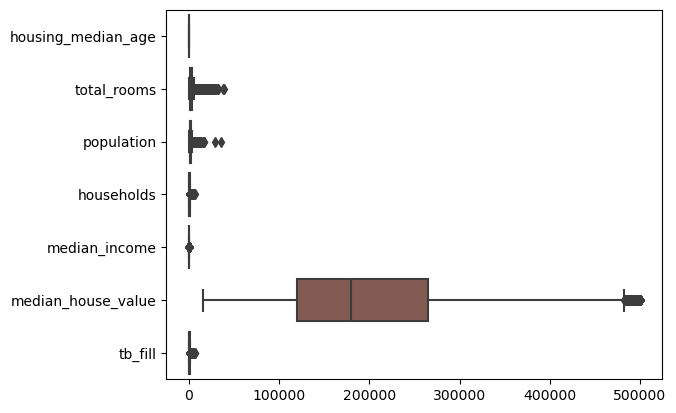

In [26]:
# 이거는 뭘 보려고 그린거지?
sns.boxplot(data=data[['housing_median_age', 'total_rooms', 'population', 'households',
       'median_income', 'median_house_value', 'tb_fill']], orient="h")

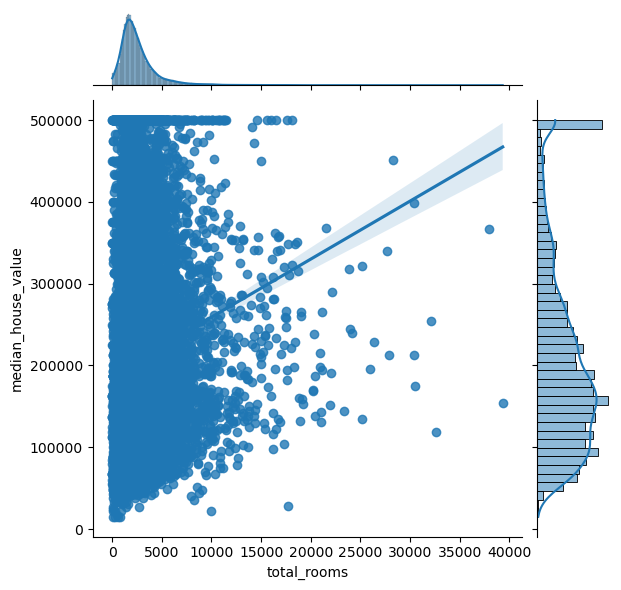

In [27]:
sns.jointplot(data=data,x="total_rooms",y="median_house_value", kind='reg')

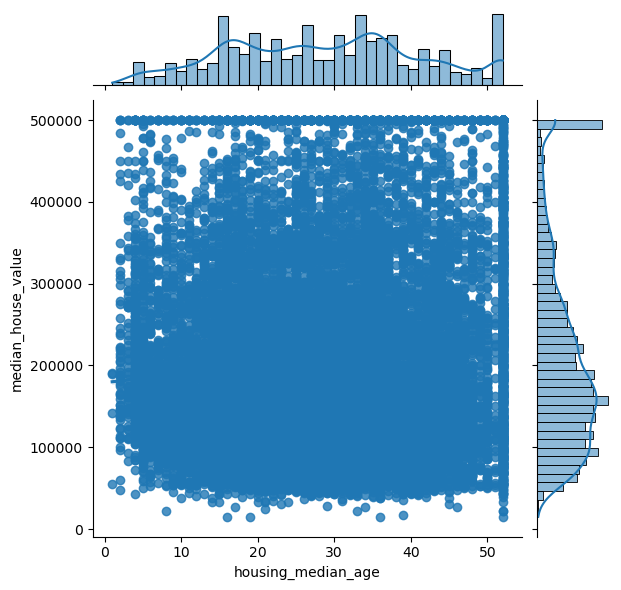

In [28]:
sns.jointplot(data=data,x="housing_median_age",y="median_house_value", kind='reg')

### 이상치 다루기 Anomaly Detection
* reference에서는 모든 수치형 변수의 이상치를 IQR*1.5 미만, 초과 수치를 이상치로 잡고 있음
* 2064 -> 18816
* 개인적으로 모든 수치가 이미 통계적인 수치라서(한 블록 당 total 값) 이상치 제거는 생략하겠다

### Preprocessing
* median_house_value 즉 집값 예측 분석에 앞서 feature 정재
* 레퍼런스에서는 ocean 컬럼 분류를 인코딩을 하는데 더미변수화를 해야하는건 아닌지 고민이 된다
* https://azanewta.tistory.com/46 -> 참고 해서 one hot encoding 선택

In [29]:
data.head(2)

,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,tb_fill
0,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY,129.0
1,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1106.0


In [30]:
# ocean_proximity 범주 5개를 4개의 더미변수 생성
ocean = pd.get_dummies(data=data["ocean_proximity"], drop_first=True)

In [31]:
data.drop(columns=["ocean_proximity"], axis=1, inplace=True)
data = pd.concat([data, ocean], axis=1)

In [32]:
data.head()

,housing_median_age,total_rooms,population,households,median_income,median_house_value,tb_fill,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,880.0,322.0,126.0,8.3252,452600.0,129.0,0,0,1,0
1,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,1106.0,0,0,1,0
2,52.0,1467.0,496.0,177.0,7.2574,352100.0,190.0,0,0,1,0
3,52.0,1274.0,558.0,219.0,5.6431,341300.0,235.0,0,0,1,0
4,52.0,1627.0,565.0,259.0,3.8462,342200.0,280.0,0,0,1,0


### Modeling
* 레퍼런스에서는 머신러닝 지도 학습 중 예측 분석에 사용되는 모든 모델의 기술 통계 값을 비교 후 선형 회귀를 선택
* 이 후 파생 변수를 만들어서 선형 회귀 모델로 집값 예측 모델을 하고 실제 값과 예측 값 정확도 비교 후 끝낸다
* 모든 모델의 기술 통계 값 비교는 생략하고 선형 회귀 모델로 바로 예측 분석을 해보겠다

### train, test set

In [34]:
data.columns

Index(['housing_median_age', 'total_rooms', 'population', 'households',
       'median_income', 'median_house_value', 'tb_fill', 'INLAND', 'ISLAND',
       'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [35]:
data2 = data[['housing_median_age', 'total_rooms', 'population', 'households',
       'median_income', 'median_house_value', 'tb_fill', 'INLAND', 'ISLAND',
       'NEAR BAY', 'NEAR OCEAN']].copy()

In [36]:
# 8 : 2 비율로 나눔
split_count = int(data2.shape[0] * 0.8)
split_count

16512

In [37]:
train = data2[:split_count]
test = data2[split_count:]
train.shape, test.shape

((16512, 11), (4128, 11))

In [38]:
label_name = "median_house_value"
label_name

'median_house_value'

In [39]:
feature_names = data2.columns.to_list()
feature_names.remove("median_house_value")
feature_names

['housing_median_age',
 'total_rooms',
 'population',
 'households',
 'median_income',
 'tb_fill',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [40]:
X_train = train[feature_names]
X_train.shape

(16512, 10)

In [41]:
y_train = train[label_name]
y_train.shape

(16512,)

In [42]:
X_test = test[feature_names]
X_test.shape

(4128, 10)

In [43]:
y_test = test[label_name]
y_test.shape

(4128,)

In [44]:
model = LinearRegression().fit(X_train, y_train)
model

LinearRegression()

In [45]:
model.score(X_train, y_train)

0.6169850702632371

In [46]:
model.coef_

array([ 1.28015570e+03, -7.92737074e+00, -3.82070398e+01,  9.50354753e+01,
        4.04401560e+04,  7.18067515e+01, -6.55544774e+04,  1.76462778e+05,
        2.13743947e+03,  1.82505580e+03])

In [47]:
model.intercept_

20244.217403162766

In [48]:
y_predict = model.predict(X_test)
y_predict

array([100728.8746675 , 121181.66160584,  83868.471982  , ...,
        64834.50466079,  72722.41806181,  91298.45696776])

In [49]:
(y_test == y_predict).mean()

0.0

<AxesSubplot:xlabel='median_house_value'>

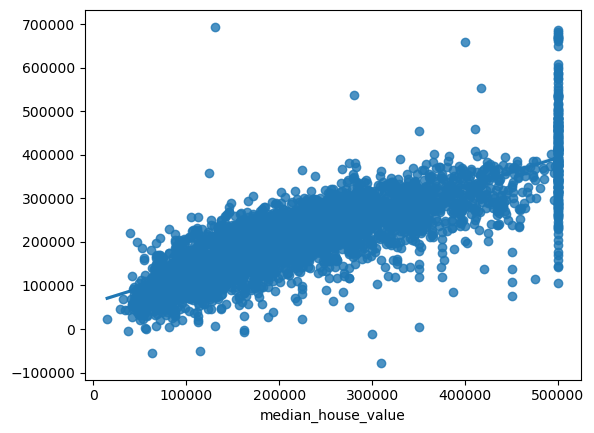

In [50]:
sns.regplot(x=y_test, y=y_predict)

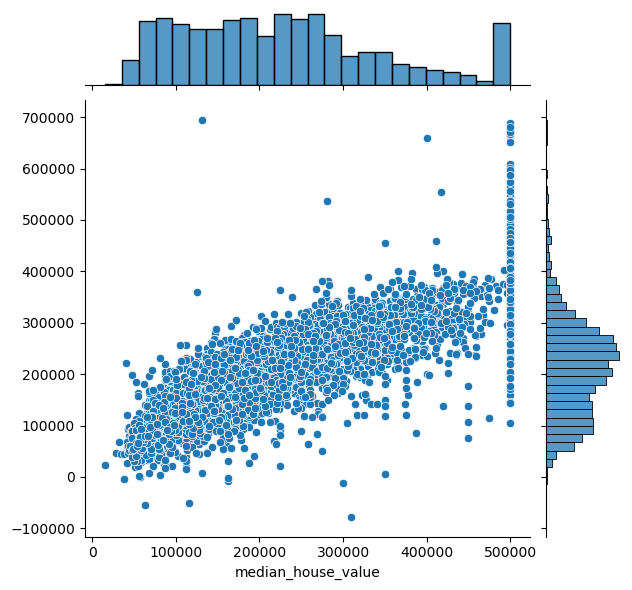

In [51]:
sns.jointplot(x=y_test, y=y_predict)

<AxesSubplot:xlabel='median_house_value'>

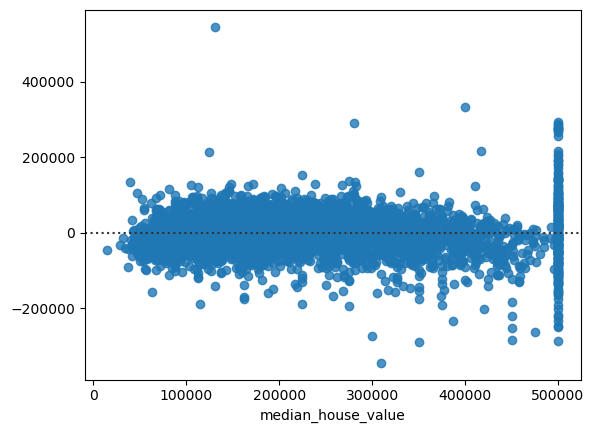

In [52]:
sns.residplot(x=y_test, y=y_predict)

In [53]:
r2_score(y_test,y_predict)

0.671283162186778

In [54]:
df_y = pd.DataFrame({"true" : y_test, "predict" : y_predict})
df_y.head()

,true,predict
16512,165600.0,100728.874668
16513,126100.0,121181.661606
16514,94400.0,83868.471982
16515,91900.0,95849.937931
16516,124300.0,105146.145421


<AxesSubplot:ylabel='Density'>

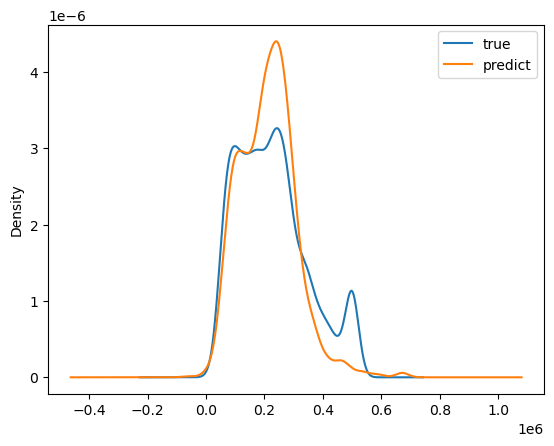

In [55]:
# distplot으로 정답값과 예측값의 분포를 그립니다.
df_y.plot(kind="kde")

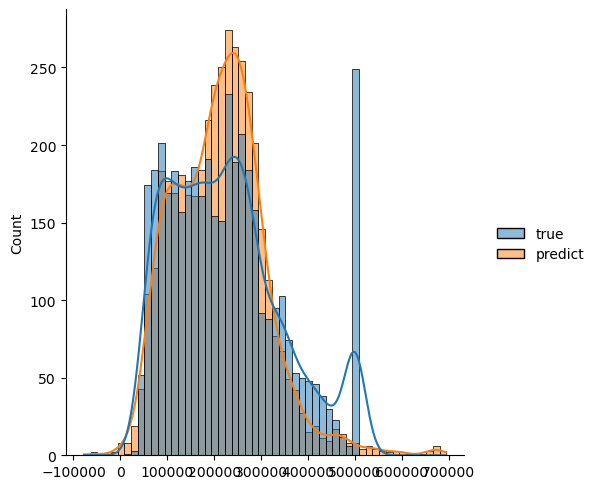

In [56]:
sns.displot(df_y, kde=True)